In [32]:
import torch
import matplotlib.pyplot as plt 
import torch.nn as nn
from torch.utils.data import DataLoader,TensorDataset

## 构造数据

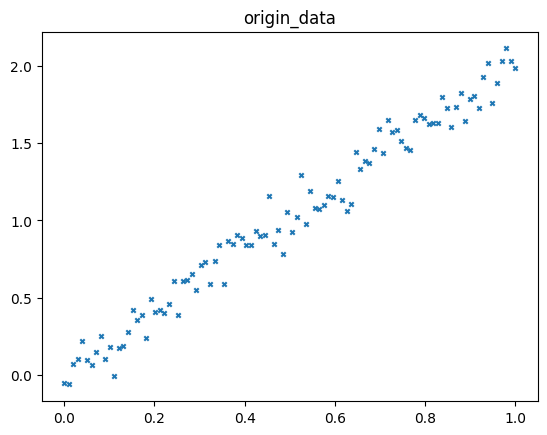

In [33]:
nums_data = 100
x = torch.linspace(0, 1, nums_data).unsqueeze(dim=1)
k = 2
#添加随机噪声
y = k * x + torch.randn(x.size()) * 0.1
# 可视化原始数据
plt.scatter(x.numpy(), y.numpy(),marker='x',s=10)
plt.title("origin_data")
plt.show()

### 定义线性模型类

In [34]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

### 定义训练的criterion,optimizer,dataloader

In [35]:
model = LinearModel()
#使用均方误差作为损失函数
criterion = nn.MSELoss()
#随机梯度下降优化
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)#学习率
data_set=TensorDataset(x,y)
#数据分批次
#这里一共100个数据，分成10份，也就是一个batch10个数据
data_loader=DataLoader(data_set,batch_size=10,shuffle=True)

### 展示初始化的模型的预测结果

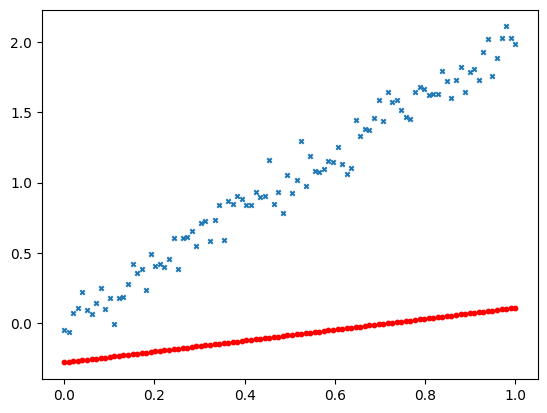

In [36]:
outputs=model(x)
plt.scatter(x.numpy(),outputs.detach().numpy(),marker='o',c='red',s=10)
plt.scatter(x,y,marker='x',s=10)

### 训练

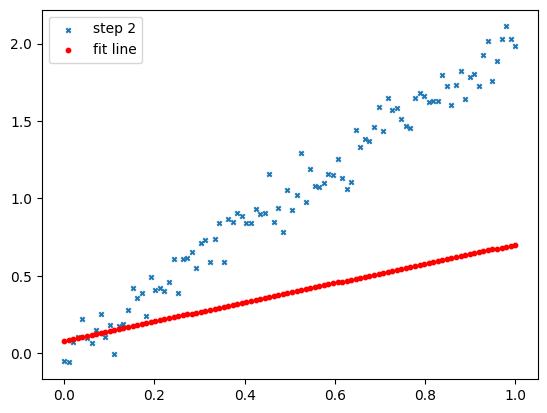

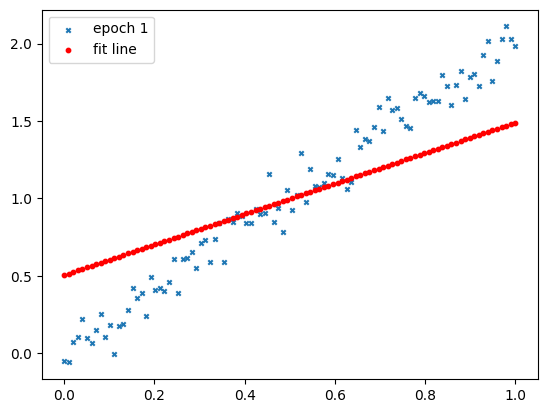

In [37]:
num_epochs = 100
step=0
for epoch in range(num_epochs):
    #因为要求展示训练几个step的，所以对训练数据分批次训练
    model.train()#确保模型处于训练状态
    for x_batch,y_batch in data_loader:
        optimizer.zero_grad()#每次训练独立，清空梯度
        outputs=model(x_batch)
        loss=criterion(outputs,y_batch)
        loss.backward()
        optimizer.step()
        #展示训练两个step的模型
        outputs=model(x)
        step+=1
        if(step==2):
            plt.scatter(x.numpy(), y.numpy(),s=10,marker='x', label='step 2')
            plt.scatter(x.numpy(), outputs.detach().numpy(), c='red', s=10,marker='o',label='fit line')
            plt.legend()
            plt.show()
    if epoch == 0:
        plt.scatter(x.numpy(), y.numpy(),s=10,marker='x', label='epoch 1')
        plt.scatter(x.numpy(), outputs.detach().numpy(), c='red', s=10,marker='o',label='fit line')
        plt.legend()
        plt.show()

### 最终训练结果可视化

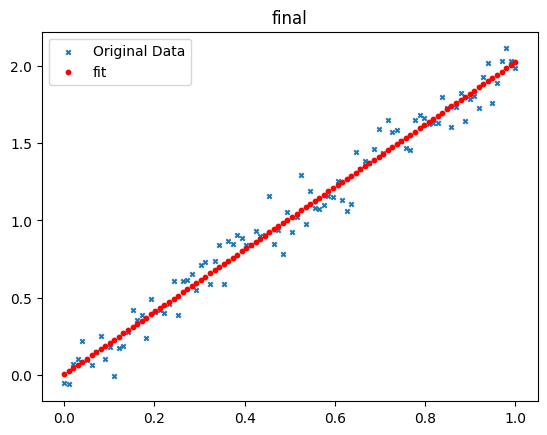

In [38]:
model.eval()
with torch.no_grad():
    final_outputs = model(x)
    plt.scatter(x.numpy(), y.numpy(),s=10,marker='x', label='Original Data')
    plt.scatter(x.numpy(), final_outputs.numpy(), c='red', s=10,marker='o',label='fit')
    plt.title("final")
    plt.legend()
    plt.show()